In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
%matplotlib inline

import matplotlib as mpl 
import matplotlib.font_manager as fm 

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] == 'NanumGothic'


False

In [3]:
#데이터 확인 및 전처리 

#2021년 공공자전거 대여 이력 정보 

#데이터 프레임 생성/확인 

df1 = pd.read_csv('./data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('./data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('./data/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('./data/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('./data/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('./data/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)

#low_memory=False 
#파일 읽을 때 낮은 메모리 사용을 위한 처리 x >> 큰 데이터 셋 처리시 유용 


In [ ]:
df6.head(3)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30385,2021-05-31 23:07:00,3571,화양 APT(횡단보도 옆),0,2021-06-01 00:00:00,03538,서울숲 IT캐슬,0,53.0,2502.8
1,SPB-46321,2021-05-31 23:37:19,1911,구로디지털단지역 앞,0,2021-06-01 00:00:02,01843,독산고등학교,0,22.0,1630.0
2,SPB-48119,2021-05-31 23:48:40,3860,건국대학교 정문 앞,0,2021-06-01 00:00:03,03586,군자역 비채온 오피스텔,0,11.0,1420.0


In [ ]:
#데이터 연결 >> 확인 

df = pd.concat([df1,df2,df3,df4,df5,df6])


In [ ]:
df.shape

(13613873, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


In [ ]:
df.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리'],
      dtype='object')

In [ ]:
#데이터 전처리 

#불필요한 컬럼 제거 

df.drop(columns=['자전거번호', '대여거치대','반납거치대'], inplace=True)

In [ ]:
df.dtypes

대여일시         object
대여 대여소번호      int64
대여 대여소명      object
반납일시         object
반납대여소번호      object
반납대여소명       object
이용시간        float64
이용거리        float64
dtype: object

In [ ]:
df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')
# df['반납대여소번호'] = df['반납대여소번호'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   object  
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(1), float64(2), object(5)
memory usage: 857.0+ MB


In [ ]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'],errors='coerce')

# errors='coerce'
# 변환 중에 오류가 발생할 경우, 해당 값을 NaT(Not at True)로 설정 


In [ ]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호             object
반납대여소명              object
이용시간               float64
이용거리               float64
dtype: object

In [ ]:
#결측치 확인 및 처리 

df.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시        146
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [ ]:
#boxplot 그려야 함

In [ ]:
#결측치 제거 

df.dropna(inplace=True)

In [ ]:
df.isnull().sum()


대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

In [ ]:
#일별 이용 현황 

#대여 날짜 컬럼 추가
df['대여일시'].dt.date

0          2021-01-02
1          2021-01-04
2          2021-01-13
3          2021-01-14
4          2021-01-18
              ...    
3445939    2021-06-30
3445940    2021-06-30
3445941    2021-06-30
3445942    2021-06-30
3445943    2021-06-30
Name: 대여일시, Length: 13613604, dtype: object

In [ ]:
df['대여날짜'] = df['대여일시'].dt.date

In [ ]:
#대여날짜 별 대여 건수 

#groupby, to_frame

#대여날짜별 대여건수 추출 

df.groupby('대여날짜')['대여일시'].count().to_frame()

,대여일시
대여날짜,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819
...,...
2021-06-26,105414
2021-06-27,92486
2021-06-28,105882


In [ ]:
df_count = df.groupby('대여날짜')['대여일시'].count().to_frame()

In [ ]:
df_count.columns = ['대여건수']
df_count

,대여건수
대여날짜,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819
...,...
2021-06-26,105414
2021-06-27,92486
2021-06-28,105882


데이터 시각화 

In [ ]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

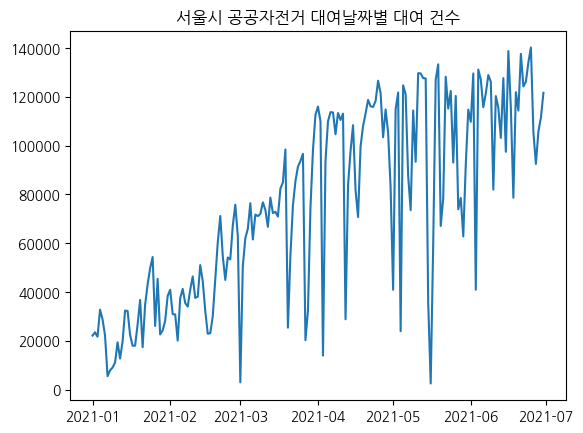

In [ ]:
plt.plot(df_count.index, df_count.values)
plt.title('서울시 공공자전거 대여날짜별 대여 건수')
plt.show()

In [ ]:
#대여날짜 별 이용시간 

df.groupby('대여날짜')['이용시간'].sum().to_frame()

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


In [ ]:
#대여날짜 별 이용 거리 

df_distance = df.groupby('대여날짜')['이용거리'].sum().to_frame()

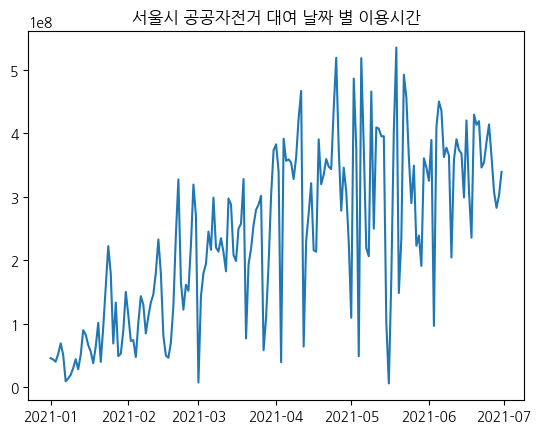

In [ ]:
df_time = df.groupby('대여날짜')['이용시간'].sum().to_frame()

#시각화 
plt.plot(df_time.index, df_distance.values)
plt.title('서울시 공공자전거 대여 날짜 별 이용시간')
plt.show()

In [ ]:
#데이터프레임 합치기 

df_date = pd.concat([df_time, df_distance,df_count], axis=1)
df_date


,이용시간,이용거리,대여건수
대여날짜,,,
2021-01-01,692309.0,4.613529e+07,22119
2021-01-02,686580.0,4.409618e+07,23463
2021-01-03,609571.0,4.059830e+07,21656
2021-01-04,750721.0,5.249645e+07,32732
2021-01-05,610227.0,6.944856e+07,28819
...,...,...,...
2021-06-26,3168288.0,3.635015e+08,105414
2021-06-27,2706168.0,3.078146e+08,92486
2021-06-28,2405249.0,2.828124e+08,105882


In [ ]:
df['대여시간'] = df['대여일시'].dt.hour
df['반납시간'] = df['반납일시'].dt.hour


In [ ]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호             object
반납대여소명              object
이용시간               float64
이용거리               float64
대여날짜                object
대여시간                 int32
반납시간                 int32
dtype: object

In [ ]:
#시간대별 대여 및 반납 현황 

df['대여시간'].value_counts()

대여시간
18    1432779
17    1178279
19     984476
16     934211
20     825031
15     816040
8      808506
21     770378
14     725175
13     667237
22     643611
12     623065
11     537810
9      499995
7      486775
10     438084
23     341859
0      240025
6      188920
1      158905
2      103629
5       84713
3       68710
4       55391
Name: count, dtype: int64

In [ ]:
s_rental = df['대여시간'].value_counts()
s_rental.head(5)


대여시간
18    1432779
17    1178279
19     984476
16     934211
20     825031
Name: count, dtype: int64

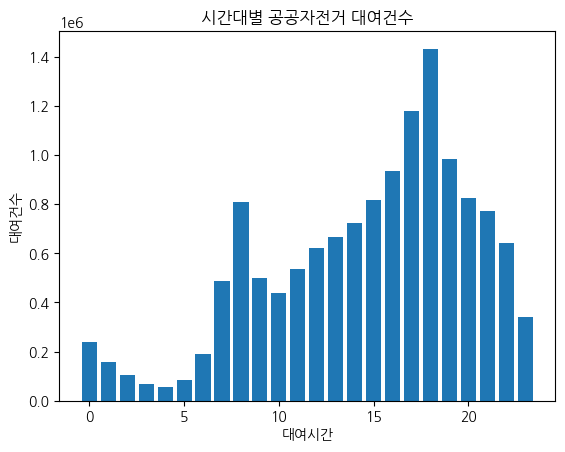

In [ ]:
#시간대별 공공자전거 대여건수 시각화 
s_rental = s_rental.sort_index()

x = s_rental.index 
y = s_rental.values

plt.bar(x,y)
plt.title('시간대별 공공자전거 대여건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()


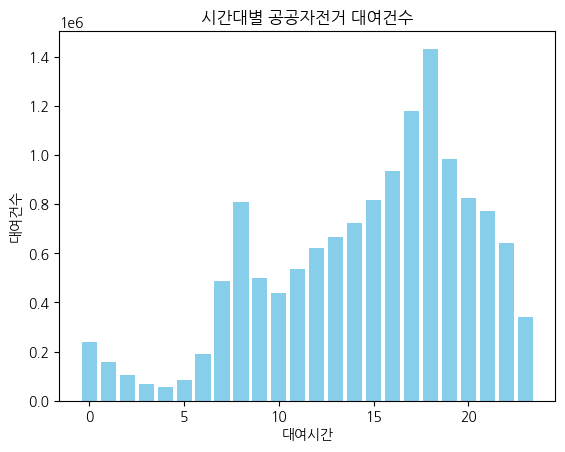

In [ ]:
#시간대별 공공자전거 대여건수 시각화 
s_rental = s_rental.sort_index()

x = s_rental.index 
y = s_rental.values

plt.bar(x,y,color='skyblue')
plt.title('시간대별 공공자전거 대여건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()


In [ ]:
#대여소별 대여 및 반납 현황 

#대여소 현황 

#대여 대여소번호 개수 
print(df['대여 대여소번호'])
print()

#반납대여소번호 개수 
print(df['반납대여소번호'])


0             3
1             3
2             3
3             3
4             3
           ... 
3445939     152
3445940     152
3445941     152
3445942    2220
3445943    2220
Name: 대여 대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

0            668
1            668
2            668
3            668
4            540
           ...  
3445939    00126
3445940    00437
3445941    00437
3445942    02526
3445943    02526
Name: 반납대여소번호, Length: 13613604, dtype: object


In [ ]:
#반납대여소 번호 처리 (왼쪽 '0' 제거 )

df['반납대여소번호'] = df['반납대여소번호'].astype('str')

In [ ]:
#데이터 타입 변환

#반납대여소 번호 처리 (왼쪽 '0' 제거 )

df['반납대여소번호']= df['반납대여소번호'].str.lstrip('0')


In [ ]:
df['반납대여소번호'] = df['반납대여소번호'].astype('category')
df['반납대여소번호']

0           668
1           668
2           668
3           668
4           540
           ... 
3445939     126
3445940     437
3445941     437
3445942    2526
3445943    2526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (2493, object): ['10', '1001', '1002', '1003', ..., '9998', '9999', '99997', '99999']

In [ ]:
df[['대여 대여소번호','대여 대여소명']].value_counts()[:10].to_frame()

,,count
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,68994
502,뚝섬유원지역 1번출구 앞,68588
152,마포구민체육센터 앞,43535
2102,봉림교 교통섬,43368
1210,롯데월드타워(잠실역2번출구 쪽),37149
2715,마곡나루역 2번 출구,36988
2177,신대방역 2번 출구,31971
272,당산육갑문,31527
210,IFC몰,31443


In [ ]:
#여의나루역 1번출구 앞 대여소 이용현황 

#서브셋 만들기 

condition = df['대여 대여소번호'] == 207
df[condition]

df_207 = df[condition]
df_207

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11
...,...,...,...,...,...,...,...,...,...,...,...
3445365,2021-06-30 22:34:23,207,여의나루역 1번출구 앞,2021-07-01 00:12:03,4526,목동아파트2단지 222동 앞,97.0,9268.32,2021-06-30,22,0
3445420,2021-06-30 22:36:03,207,여의나루역 1번출구 앞,2021-07-01 00:12:31,1148,볏골공원,96.0,10957.26,2021-06-30,22,0
3445452,2021-06-30 22:36:11,207,여의나루역 1번출구 앞,2021-07-01 00:12:44,704,남부법원검찰청 교차로,96.0,11358.59,2021-06-30,22,0
3445463,2021-06-30 22:53:04,207,여의나루역 1번출구 앞,2021-07-01 00:12:47,207,여의나루역 1번출구 앞,80.0,0.00,2021-06-30,22,0


In [ ]:
df_207[['반납대여소번호','반납대여소명']].value_counts().to_frame()

,,count
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
...,...,...
4768,서울도시건축전시관,1
469,회현역 1번출구,1
4673,골드제련앞,1


In [ ]:
df_207.columns

Index(['대여일시', '대여 대여소번호', '대여 대여소명', '반납일시', '반납대여소번호', '반납대여소명', '이용시간',
       '이용거리', '대여날짜', '대여시간', '반납시간'],
      dtype='object')

In [ ]:
df_207['대여일시'].dt.strftime('%a') #%a 알파벳으로 보여줘 

45838      Fri
45839      Fri
45840      Fri
45841      Fri
45842      Fri
          ... 
3445365    Wed
3445420    Wed
3445452    Wed
3445463    Wed
3445487    Wed
Name: 대여일시, Length: 68995, dtype: object

In [ ]:
df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')

df_207['대여요일']

C:\Users\Master\AppData\Local\Temp\ipykernel_1744\3783177134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')


45838      Fri
45839      Fri
45840      Fri
45841      Fri
45842      Fri
          ... 
3445365    Wed
3445420    Wed
3445452    Wed
3445463    Wed
3445487    Wed
Name: 대여요일, Length: 68995, dtype: object

In [ ]:
df_207['대여요일'].value_counts()

대여요일
Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8037
Tue     7235
Name: count, dtype: int64

In [ ]:
#이용시간 통계
df_207['이용시간'].describe()

count    68995.000000
mean        50.285513
std         35.500149
min          1.000000
25%         23.000000
50%         47.000000
75%         68.000000
max       1268.000000
Name: 이용시간, dtype: float64

In [ ]:
round(df['이용시간'].describe(),2)

count    13613604.00
mean           27.28
std            29.21
min             1.00
25%             8.00
50%            16.00
75%            37.00
max          2323.00
Name: 이용시간, dtype: float64